# God Components project Statistics
First, load the data.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from designite.git_utils import get_commits, compute_locs, git_checkout
from tqdm import tqdm
tqdm.pandas()
all_reports = pd.read_csv('designite/output/all_reports.csv')
all_reports.head()

,commit,repo,package,smell,cause,metric
0,49bb4691393c016d8d65e6b11febca9e56feedef,tika-cpu_21,org.apache.tika.example,God Component,MANY_CLASSES,49
1,49bb4691393c016d8d65e6b11febca9e56feedef,tika-cpu_21,org.apache.tika.batch,God Component,MANY_CLASSES,31
2,49bb4691393c016d8d65e6b11febca9e56feedef,tika-cpu_21,org.apache.tika.detect,God Component,MANY_CLASSES,31
3,49bb4691393c016d8d65e6b11febca9e56feedef,tika-cpu_21,org.apache.tika.parser,God Component,MANY_CLASSES,37
4,49bb4691393c016d8d65e6b11febca9e56feedef,tika-cpu_21,org.apache.tika.mime,God Component,MANY_CLASSES,31


Get a feel of our data.

In [3]:
commits = get_commits()
commits.head()

,id,author,datetime,message,jira
0,7f65d61b4fe1f4c1d4929bbe1c456c68afd44b6c,THausherr,2020-12-14 06:57:27+01:00,TIKA-3248: revert accidental commit (2nd try),TIKA-3248
1,326b7d7abda238ccc181fc2acaf2271e08fe9c1b,THausherr,2020-12-14 06:34:03+01:00,"Revert ""Merge origin/main into main""",NaN
2,dd85c73094dc87f6f6e208278325be810761f490,THausherr,2020-12-14 05:50:27+01:00,Merge origin/main into main,NaN
3,081070065ec2a989ecfccb9d1186610bbce52f5e,THausherr,2020-12-14 05:46:44+01:00,TIKA-3248: avoid ClassCastException,TIKA-3248
4,3571725a948a4676f1904799209271eeaf18b102,PeterAlfredLee,2020-12-01 10:40:33+08:00,Simplify init code of some Set and List,NaN


## God component lifetime
General statistics on lifetime.

In [9]:
data = commits.merge(all_reports, left_on='id', right_on='commit')
dt = data.groupby('package')['datetime']
dtmin = dt.min()
dtmax = dt.max()
dtmindt = pd.to_datetime(dtmin,utc=True).dt.tz_convert('Europe/Amsterdam')
dtmaxdt = pd.to_datetime(dtmax,utc=True).dt.tz_convert('Europe/Amsterdam')
pd.DataFrame([dtmin, dtmax, dt.count(), (dtmaxdt - dtmindt).dt.days],
    ['Became GC at', 'Last seen as GC', '# GC commits', '# GC days'])\
    .transpose().reset_index()

,package,Became GC at,Last seen as GC,# GC commits,# GC days
0,org.apache.tika.batch,2015-06-28 01:57:30+00:00,2020-12-14 06:57:27+01:00,2352,1996
1,org.apache.tika.detect,2017-01-19 20:27:39+03:00,2020-12-14 06:57:27+01:00,1579,1424
2,org.apache.tika.example,2015-05-04 21:52:53+00:00,2020-12-14 06:57:27+01:00,2433,2050
3,org.apache.tika.fork,2018-05-31 15:25:08-04:00,2020-12-14 06:57:27+01:00,738,927
4,org.apache.tika.metadata,2016-09-26 12:24:14-04:00,2020-12-14 06:57:27+01:00,1743,1539
5,org.apache.tika.mime,2015-05-02 04:58:35+00:00,2020-12-14 06:57:27+01:00,2443,2053
6,org.apache.tika.parser,2015-02-21 05:17:58+00:00,2020-12-14 06:57:27+01:00,2429,2123
7,org.apache.tika.parser.microsoft,2011-11-25 15:26:02+00:00,2020-12-14 06:57:27+01:00,3052,3306
8,org.apache.tika.parser.microsoft.chm,2020-08-21 11:32:26-04:00,2020-12-14 06:57:27+01:00,155,114
9,org.apache.tika.parser.microsoft.onenote,2019-12-16 15:56:48-06:00,2020-12-14 06:57:27+01:00,305,363


Total amount of God Components

<AxesSubplot:xlabel='datetime', ylabel='# god components'>

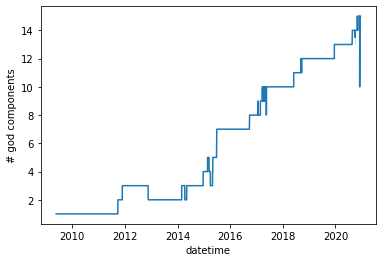

In [47]:
total_gcs = data.groupby(['commit', 'datetime']).count().reset_index()
total_gcs = total_gcs.rename(columns={'# classes': '# god components'})
sns.lineplot(data=total_gcs, x='datetime', y='# god components')

Amount of classes per God Component

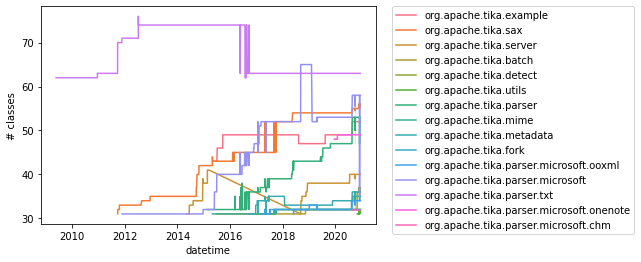

In [18]:
data = commits.merge(all_reports, left_on='id', right_on='commit')
data['# classes'] = data['metric']
sns.lineplot(data=data, x='datetime', y='# classes', hue='package')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### God Components per Line Of Code (LOC)

In [19]:
git_checkout(1, 'main') # make sure repo(1) is recently `git pull`'ed

godcomps = all_reports['package'].unique()
mapped_commits = []
for index, row in tqdm(commits.iterrows(), total=commits.shape[0]):
    mapped_commits.append(compute_locs(godcomps, row))
all_locs = pd.concat(mapped_commits)
all_locs.head()

100%|██████████| 4954/4954 [04:45<00:00, 17.35it/s]


,additions,deletions,godcomp,id,author,datetime,message,jira
0,1,3,org.apache.tika.batch,7f65d61b4fe1f4c1d4929bbe1c456c68afd44b6c,THausherr,2020-12-14 06:57:27+01:00,TIKA-3248: revert accidental commit (2nd try),TIKA-3248
1,8,14,org.apache.tika.parser,7f65d61b4fe1f4c1d4929bbe1c456c68afd44b6c,THausherr,2020-12-14 06:57:27+01:00,TIKA-3248: revert accidental commit (2nd try),TIKA-3248
2,2,3,org.apache.tika.parser.microsoft,7f65d61b4fe1f4c1d4929bbe1c456c68afd44b6c,THausherr,2020-12-14 06:57:27+01:00,TIKA-3248: revert accidental commit (2nd try),TIKA-3248
3,1,3,org.apache.tika.server,7f65d61b4fe1f4c1d4929bbe1c456c68afd44b6c,THausherr,2020-12-14 06:57:27+01:00,TIKA-3248: revert accidental commit (2nd try),TIKA-3248
4,2,4,org.apache.tika.fork,7f65d61b4fe1f4c1d4929bbe1c456c68afd44b6c,THausherr,2020-12-14 06:57:27+01:00,TIKA-3248: revert accidental commit (2nd try),TIKA-3248


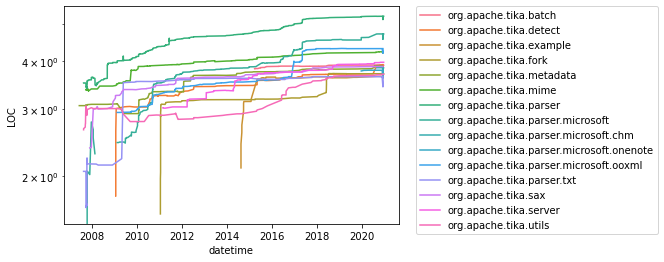

In [21]:
# Compute LOC change for every godcomp
godcomp_dfs = []
for godcomp, df in all_locs.groupby('godcomp'):
    df = df.sort_values('datetime')
    df['change'] = df['additions'] - df['deletions']
    df['LOC'] = df['change'].cumsum()
    godcomp_dfs.append(df)
data = pd.concat(godcomp_dfs)

# Plot
fig, ax = plt.subplots()
ax.set(yscale="log")
sns.lineplot(data=data, x='datetime', y='LOC', hue='godcomp', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)